In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
260635,260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0


In [4]:
df2 = df[["Date","Sub_metering_3"]]

In [5]:
df2["Date"] = pd.to_datetime(df2["Date"], format="mixed")

C:\Users\nicol\AppData\Local\Temp\ipykernel_916\2041210807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Date"] = pd.to_datetime(df2["Date"], format="mixed")


In [6]:
df2["Month"] = df2["Date"].dt.month

C:\Users\nicol\AppData\Local\Temp\ipykernel_916\3193109384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Month"] = df2["Date"].dt.month


In [7]:
df2["Day"] = df2["Date"].dt.day

C:\Users\nicol\AppData\Local\Temp\ipykernel_916\3278518967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Day"] = df2["Date"].dt.day


In [8]:
df2.drop("Date",axis=1, inplace=True)

C:\Users\nicol\AppData\Local\Temp\ipykernel_916\4148395403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop("Date",axis=1, inplace=True)


In [9]:
df2

,Sub_metering_3,Month,Day
0,0.0,1,1
1,0.0,1,1
2,0.0,1,1
3,0.0,1,1
4,0.0,1,1
...,...,...,...
260635,18.0,6,30
260636,17.0,6,30
260637,18.0,6,30
260638,18.0,6,30


In [10]:
df2 = df2[ df2["Sub_metering_3"]  > 0.0 ]

In [20]:
df2.groupby(['Month', 'Day']).sum()

Sub_metering_3
Month Day                
1     1            5880.0
      2           13145.0
      3            1980.0
      4           19509.0
      5            8546.0
...                   ...
12    2           11517.0
      3           12353.0
      4            1818.0
      5           10408.0
      6            3898.0

[179 rows x 1 columns]

<Axes: >

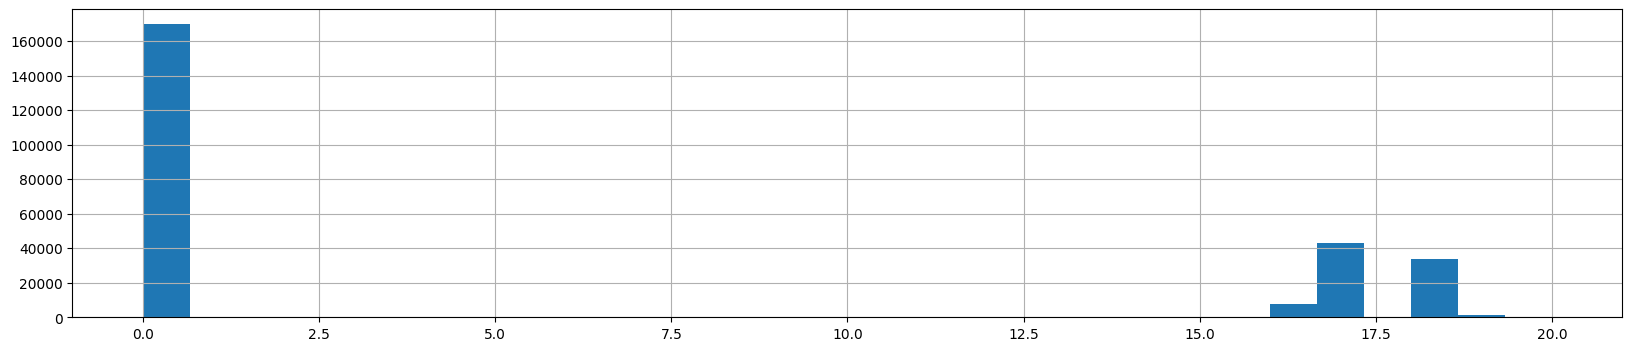

In [21]:
df['Sub_metering_3'].hist(bins=30, figsize=(20,4))

In [22]:
X = df2[["Month","Day"]]

In [24]:
y = df2["Sub_metering_3"]

In [25]:
type(X)

pandas.core.frame.DataFrame

In [26]:
type(X.values)

numpy.ndarray

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.2, random_state=42)
#împărțim setul în antrenament și testare

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000)

In [48]:
y_pred = model.predict(X_test)
# rezultatul predicției pentru proba de testare

In [49]:
r2_score(y_test, y_pred)
# metrica r2

0.06449263821114903

In [32]:
import pickle

In [33]:
# Save the trained model using pickle
with open('random_forest_model_per_day.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully.")

Model saved successfully.


In [34]:
# Load the model from pickle file
with open('random_forest_model_per_day.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [36]:
X

,Month,Day
559,1,1
560,1,1
561,1,1
562,1,1
563,1,1
...,...,...
260635,6,30
260636,6,30
260637,6,30
260638,6,30


In [37]:


# Predict using the loaded model
prediction = loaded_model.predict([[1,20]])
print("Prediction for the new row:", prediction)

Prediction for the new row: [17.06016326]


d:\__A_EXCALIBUR\excalibur-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
